### In this notebook, we explore the Stockfish and chess packages in Python, describe chess notations -- FEN and SAN -- chess position evalations and human versus computer moves.

In [338]:
import chess 
from stockfish import Stockfish

## Stockfish

Stockfish is a computer program used to evaluate chess positions, determining who is stronger, and by how much between the white and black pieces. 

The Stockfish engine provides a numerical output, called an evaluation. An output close to "0" means that with perfect play the position will most likely end in a draw, an output with positive values indicates white has an advantage, an output with negative values indicates an advantage for black, and an output of the form "M#" for "#" an integer means that a guaranteed checkmate in "#" moves for a player is on the board.

The depth of Stockfish refers to how many moves into the future the engine is caluclating the position. For if we start of a game of chess and play any 10 legal moves between black and white, there are 69,352,859,712,417 possible positions we can end up in. So Stockfish at depth d=10, would have 69,352,859,712,417 to run through at the beginning of a game to determine the best moves. A sequence of one or more moves is called a line. If it is white's turn (resp. black's) the line of length d with the best evaluation after the dth move is the position that brings the highest evalutation (resp. lowest evaluation) represents the best evaluation the engine computes (assuming perfect play from both players in the next d moves).



In this notebook, particularly in describing functions in Stockfish and Chess, we follow the notebook provided by
https://github.com/rogerfitz/tutorials/blob/master/python_chess/1_Using_PGN_Databases_and_Running_Stored_Game.ipynb

In [339]:
import chess.pgn
import pandas as pd
pd.options.display.max_columns=999
import datetime as dt
import tqdm
import zipfile

# Chess Board in Python

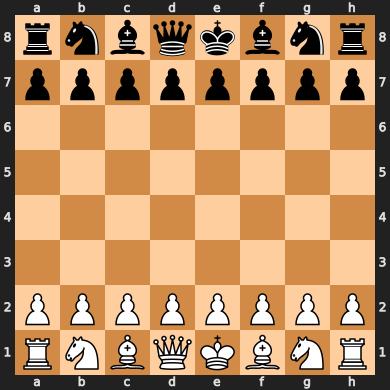

In [340]:
board = chess.Board()
board

In [341]:
print(board)
#White capital letters, black lowercase, . = empty

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R


# SAN and Some Handy Functions

In [342]:
#List of legal moves
board.legal_moves

<LegalMoveGenerator at 0x1298916d0 (Nh3, Nf3, Nc3, Na3, h3, g3, f3, e3, d3, c3, b3, a3, h4, g4, f4, e4, d4, c4, b4, a4)>

Here moves are written in Standard Algebraic Notation (SAN) https://en.wikipedia.org/wiki/Algebraic_notation_(chess). N, B, R, Q, K represent a knight, bishop, rook, queen, and king, respectively. The move 'Nh3' would mean the 'Knight on g1 of white goes to h3'. Moves involving pawns do not use letters -- for example 'h3' would mean move the 'pawn on h2 to h3'. See the link for more information on how to annotate pieces being captured, checks, checkmates, castling, etc. 

In [343]:
#Is the position in checkmate?
board.is_checkmate()

False

In [344]:
#Making moves. Use standard algebraic notation (SAN)
board.push_san("e4")

#or board.push_san("e2e4")

Move.from_uci('e2e4')

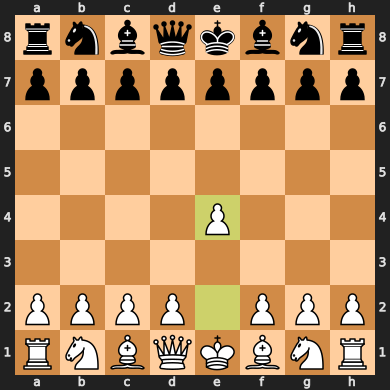

In [345]:
board

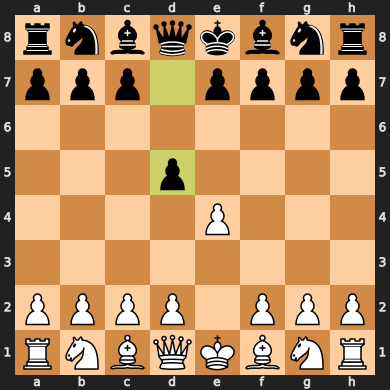

In [346]:
board.push_san("d7d5")
board

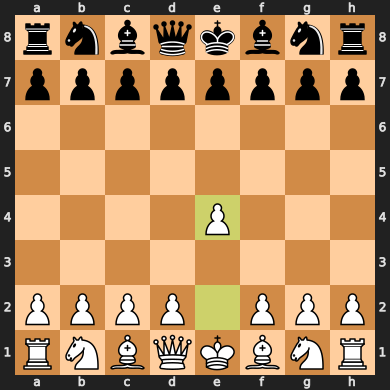

In [347]:
#Revert move (previous position)
board.pop()
board

FEN is one way to represent a game state (Forsyth–Edwards Notation). Black pieces are lower case, white uppoer case, with r,n,b,q,k,p representing the rook, knight, bishop, king, and queen respectively. Numbers indicate unoccupied spaces in a row from left to right (column a to column g), slashes separate ranks from each other starting from the top (from rank 8 to rank 1). Other important indicators, such as whose move it is, if king or queen side castling is available for each side, if en passant is a legal move in the position, are all represented here, see https://en.wikipedia.org/wiki/Forsyth%E2%80%93Edwards_Notation.


In [348]:
#should print 'rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq e3 0 1'
board.fen()

'rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq - 0 1'

In [349]:
from stockfish import Stockfish
#https://github.com/zhelyabuzhsky/stockfish/blob/master/stockfish/models.py
stockfish=Stockfish("/Users/philipbarron/Desktop/GitHub/Stockfish/stockfish/stockfish-macos-x86-64-avx2")
stockfish.set_depth(20)#How deep the AI looks
stockfish.set_skill_level(20)#Highest rank stockfish
stockfish.get_parameters()

{'Debug Log File': '',
 'Contempt': 0,
 'Min Split Depth': 0,
 'Ponder': 'false',
 'MultiPV': 1,
 'Skill Level': 20,
 'Move Overhead': 10,
 'Minimum Thinking Time': 20,
 'Slow Mover': 100,
 'UCI_Chess960': 'false',
 'UCI_LimitStrength': 'false',
 'UCI_Elo': 1350,
 'Threads': 1,
 'Hash': 16}

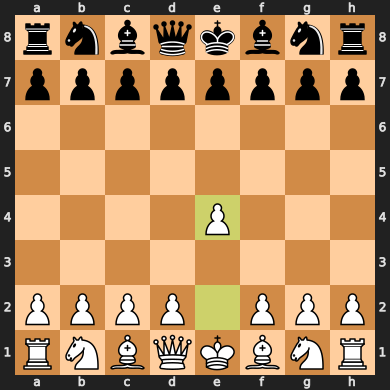

{'type': 'cp', 'value': 22}

In [350]:
#To interface with our stored board we use FEN
display(board)
stockfish.set_fen_position(board.fen())
stockfish.get_evaluation()

## Differing evaluations at different depths
Let's look at an example where going further in depth the evaluation changes drastically. We look at the game played between Mamedyarov, Shakhriyar (2712) - Giri, Anish (2737) 
Aimchess Rapid | Prelims (chess24.com) 3 2022.10.14 (https://www.chess.com/events/2022-champions-chess-tour-aimchess-rapid-prelims/03/Mamedyarov_Shakhriyar-Giri_Anish), where Mamedyarov wins after a sequence of sacrificing his rook.

We upload a position using 'FEN' to the position immediately before Mamedyarov (White) makes the rook sacrifice 'g1g4'. We will look at how Stockfish views the evaluation and the different top moves at different depths.

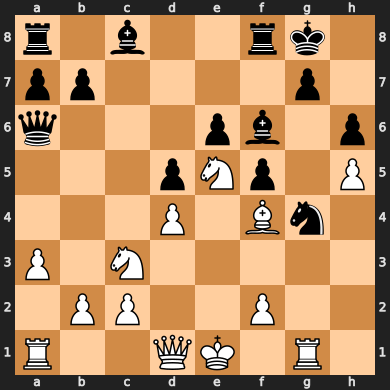

In [363]:
mamedyarov_sac = chess.Board('r1b2rk1/pp4p1/q3pb1p/3pNp1P/3P1Bn1/P1N5/1PP2P2/R2QK1R1 w Q - 1 15')
mamedyarov_sac

In [364]:
mamedyarov_sac.fen()

'r1b2rk1/pp4p1/q3pb1p/3pNp1P/3P1Bn1/P1N5/1PP2P2/R2QK1R1 w Q - 1 15'

In [365]:
stockfish.set_fen_position(mamedyarov_sac.fen())

In [366]:
#Set stockfish depth to 5
stockfish.set_depth(5)

#Display the top 5 moves at depth 5
stockfish.get_top_moves(5)

[{'Move': 'e5g6', 'Centipawn': 51, 'Mate': None},
 {'Move': 'c3e2', 'Centipawn': 40, 'Mate': None},
 {'Move': 'd1d2', 'Centipawn': 40, 'Mate': None},
 {'Move': 'd1f3', 'Centipawn': 28, 'Mate': None},
 {'Move': 'e5g4', 'Centipawn': 26, 'Mate': None}]

In [367]:
#Set Stockfish depth back to 20
stockfish.set_depth(20)

#Display the top 5 moves at depth 20
stockfish.get_top_moves(5)

[{'Move': 'g1g4', 'Centipawn': 148, 'Mate': None},
 {'Move': 'c3e2', 'Centipawn': 56, 'Mate': None},
 {'Move': 'd1d2', 'Centipawn': 42, 'Mate': None},
 {'Move': 'd1d3', 'Centipawn': 30, 'Mate': None},
 {'Move': 'd1e2', 'Centipawn': 13, 'Mate': None}]

At depth 5, the engine doesn't spot the Rook sacrifice, 'g1g4', maintaining an advantage above +100 Centipawn. All other moves would result in draws with perfect play -- in fact only one of the depth 5 top moves ('d1d2') is among the depth 20 top moves.

Let's push the winning move on the board that Mamedyarov made, 16. 'g1g4'. And now calculate evaluations.

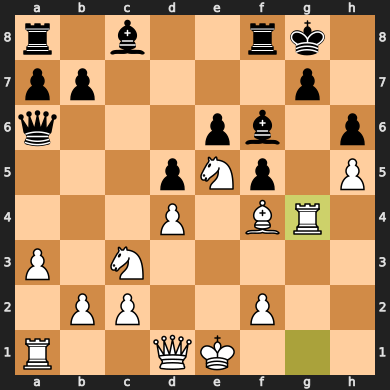

In [368]:
#Apply the move 'Rook from g1 to g4'
mamedyarov_sac.push_san('Rg4')
mamedyarov_sac

In [369]:
#Set stockfish depth to 5 and find the top 5 moves for Black
stockfish.set_fen_position(mamedyarov_sac.fen())
stockfish.set_depth(5)
stockfish.get_top_moves(5)

[{'Move': 'f5g4', 'Centipawn': 14, 'Mate': None},
 {'Move': 'f6e5', 'Centipawn': 415, 'Mate': None},
 {'Move': 'g7g5', 'Centipawn': 415, 'Mate': None},
 {'Move': 'a6b6', 'Centipawn': 474, 'Mate': None},
 {'Move': 'c8d7', 'Centipawn': 480, 'Mate': None}]

In [370]:
#Set stockfish depth to 20 and find the top 5 moves for Black
stockfish.set_depth(20)
stockfish.get_top_moves(5)

[{'Move': 'f5g4', 'Centipawn': 141, 'Mate': None},
 {'Move': 'f6e5', 'Centipawn': 246, 'Mate': None},
 {'Move': 'g7g5', 'Centipawn': 416, 'Mate': None},
 {'Move': 'c8d7', 'Centipawn': 428, 'Mate': None},
 {'Move': 'f8d8', 'Centipawn': 449, 'Mate': None}]

The engine still believes that at depth 5, that the game is a draw if the player spots 'f5g4' and each player the subsequent best moves. While at depth 20, although the best moves is the same, 'f5g4' has an evaluation of +1.41 for White.

Mamedyarov spotted the Rook sacrifice in about 20 seconds, which Stockfish at depth 5 didn't recognize as a winning a move. Mamedyarov being top Grand Master has incredibly quick calculation skills to find such a move. If an intermediate player found such a move in a time, and knew it was the right move, it could suspicious of them using an engine like Stockfish.

### What if we took the top low-depth move. Pawn a3 to a4. How would it affect the evaluation?

In [373]:
mamedyarov_sac_low_depth = chess.Board('r1b2rk1/pp4p1/q3pb1p/3pNp1P/3P1Bn1/P1N5/1PP2P2/R2QK1R1 w Q - 1 15')


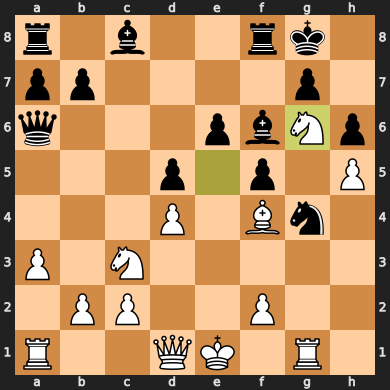

In [374]:
#Apply the move 'knight from e5 to g6', the top engine move at depth 5.
mamedyarov_sac_low_depth.push_san('e5g6')
mamedyarov_sac_low_depth

In [375]:
mamedyarov_sac_low_depth.fen()

'r1b2rk1/pp4p1/q3pbNp/3p1p1P/3P1Bn1/P1N5/1PP2P2/R2QK1R1 b Q - 2 15'

In [376]:
#Set Stockfish depth back to 20, find the evaluations, and best moves
stockfish.set_fen_position(mamedyarov_sac_low_depth.fen())
stockfish.set_depth(20)
stockfish.get_top_moves(5)

[{'Move': 'a6b6', 'Centipawn': -53, 'Mate': None},
 {'Move': 'a6c4', 'Centipawn': 44, 'Mate': None},
 {'Move': 'f8e8', 'Centipawn': 92, 'Mate': None},
 {'Move': 'e6e5', 'Centipawn': 155, 'Mate': None},
 {'Move': 'c8d7', 'Centipawn': 161, 'Mate': None}]

In [377]:
#Set Stockfish depth back to 5, find the evaluations, and best moves
stockfish.set_fen_position(mamedyarov_sac_low_depth.fen())
stockfish.set_depth(5)
stockfish.get_top_moves(5)

[{'Move': 'f8e8', 'Centipawn': 3, 'Mate': None},
 {'Move': 'f8d8', 'Centipawn': 28, 'Mate': None},
 {'Move': 'a6b6', 'Centipawn': 46, 'Mate': None},
 {'Move': 'e6e5', 'Centipawn': 102, 'Mate': None},
 {'Move': 'a6c4', 'Centipawn': 106, 'Mate': None}]

Here on depth 5, we see top engine moves for Black with 3 Centipawn, essentially 0. This indicates that stockfish was overestimating the strength of the move at depth 5, where the strength of the move 'e5g6' was estimated to be 51 Centipawn. In other words, setting to depth 6 from our original position, one would have a Centipawn evaluation of about 3 for the move 'a3a4'. In fact, from our starting position, we don't even see 'e5g6' among the top 5 moves at depth 20.

# Lichess and PGN files

Lichess is an open-source chess website in which players can play against each online across the world. Any game played on their website/app can be downloaded as a PGN (player game notation file) which can be used to see the game state of a chess game after each move.

Below is an example of a PGN file for the game we briefly analyzed in the previous section.

[Event "Meltwater Champions Chess Tour | Aimchess Rapid | Prelims"]
[Site "Chess.com"]
[Date "2022.10.14"]
[Round "03"]
[White "Mamedyarov, Shakhriyar"]
[Black "Giri, Anish"]
[Result "1-0"]
[WhiteElo "2747"]
[BlackElo "2721"]
[TimeControl "900+10"]

1. d4 {[%clk 0:15:20]} 1... Nf6 {[%clk 0:15:20]} 2. Nc3 {[%clk 0:15:25]} 2... d5
{[%clk 0:15:26]} 3. Bf4 {[%clk 0:15:33]} 3... e6 {[%clk 0:15:22]} 4. Nb5 {[%clk
0:15:35]} 4... Na6 {[%clk 0:15:32]} 5. e3 {[%clk 0:15:42]} 5... Be7 {[%clk
0:15:41]} 6. h4 {[%clk 0:14:45]} 6... O-O {[%clk 0:15:31]} 7. Nf3 {[%clk
0:14:51]} 7... c6 {[%clk 0:15:04]} 8. Nc3 {[%clk 0:14:59]} 8... Qb6 {[%clk
0:15:14]} 9. a3 {[%clk 0:12:00]} 9... c5 {[%clk 0:15:22]} 10. Bxa6 {[%clk
0:11:43]} 10... Qxa6 {[%clk 0:14:40]} 11. h5 {[%clk 0:11:42]} 11... h6 {[%clk
0:14:46]} 12. g4 {[%clk 0:11:37]} 12... Nxg4 {[%clk 0:13:23]} 13. Rg1 {[%clk
0:11:44]} 13... f5 {[%clk 0:12:33]} 14. Ne5 {[%clk 0:11:53]} 14... cxd4 {[%clk
0:10:52]} 15. exd4 {[%clk 0:10:41]} 15... Bf6 {[%clk 0:10:46]} 16. Rxg4 {[%clk
0:10:22]} 16... fxg4 {[%clk 0:10:45]} 17. Qxg4 {[%clk 0:10:33]} 17... b5 {[%clk
0:04:37]} 18. Bxh6 {[%clk 0:07:33]} 18... Qb7 {[%clk 0:03:32]} 19. O-O-O {[%clk
0:06:21]} 19... a5 {[%clk 0:01:58]} 20. Nxb5 {[%clk 0:05:18]} 20... Qxb5 {[%clk
0:01:52]} 21. Bxg7 {[%clk 0:05:27]} 21... Bxg7 {[%clk 0:02:02]} 22. h6 {[%clk
0:05:35]} 22... Ra7 {[%clk 0:02:11]} 23. Rh1 {[%clk 0:05:39]} 23... Rxf2 {[%clk
0:00:50]} 24. h7+ {[%clk 0:04:53]} 24... Kf8 {[%clk 0:00:58]} 25. Qxg7+ {[%clk
0:03:53]} 25... Rxg7 {[%clk 0:01:05]} 26. h8=Q+ {[%clk 0:04:01]} 26... Rg8
{[%clk 0:00:26]} 27. Ng6+ {[%clk 0:04:08]} 27... Ke8 {[%clk 0:00:30]} 28. Qxg8+
{[%clk 0:04:17]} 28... Kd7 {[%clk 0:00:40]} 29. Ne5+ {[%clk 0:03:37]} 29... Kd6
{[%clk 0:00:24]} 30. Nd3 {[%clk 0:03:33]} 1-0

After each number 'n.', is the nth move of each player. White is listed first and they make the first move, followed by Black. Sometimes, such as in this file, we have timestamps indicating how much time was on the clock after a player made a move, e.g., 29. Ne5+ {[%clk 0:03:37]}.

Headers vary between different PGN files, but we see that the player names, their ELO ratings, the time control of the match, where/when the match took place are all listed.

Let's show some functions we can do with PGN files.

In [23]:
import chess.pgn
import pandas as pd
pd.options.display.max_columns=999
import datetime
import tqdm
import zipfile

## Put PGN into a nicer format

Put in url of game e.g., "https://lichess.org/WbgBrAHb", if you put #n after the url, you'll have the game state after n turns.

In [24]:
NUM_GAMES = 100000 #https://database.nikonoel.fr/ Not necessary but helpful for tqdm to give an estimate
rows=[]
with open(f'/Users/philipbarron/Desktop/GitHub/Chess_DL/lichess_elite_2022-08.pgn') as pgn:
    for game in tqdm.tqdm(range(NUM_GAMES)):
        row={}
        game = chess.pgn.read_game(pgn)
        row['headers']=game.headers.__dict__
        row['moves']=[x.uci() for x in game.mainline_moves()]
        rows.append(row)
games=pd.DataFrame(rows)
games

100%|██████████████████████████████████| 100000/100000 [05:50<00:00, 285.47it/s]


,headers,moves
0,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[g1f3, e7e6, d2d4, d7d5, e2e3, g8f6, f1d3, f8e..."
1,{'_tag_roster': {'Event': 'Rated Blitz tournam...,"[e2e4, e7e6, d2d4, d7d5, f1d3, c7c5, e4d5, d8d..."
2,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[b2b3, d7d5, c1b2, c8g4, h2h3, g4h5, g2g3, e7e..."
3,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[e2e4, c7c5, g1f3, d7d6, d2d4, c5d4, f3d4, g8f..."
4,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[d2d4, d7d5, g1f3, c8f5, c1f4, c7c6, e2e3, d8b..."
...,...,...
99995,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[g1f3, d7d6, d2d4, g7g6, g2g3, f8g7, f1g2, g8f..."
99996,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[e2e4, c7c5, g1f3, b8c6, d2d4, c5d4, f3d4, g8f..."
99997,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[e2e4, c7c5, b1c3, g7g6, g2g3, f8g7, f1g2, b8c..."
99998,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[d2d4, d7d5, c2c4, e7e6, g1f3, c7c6, b1d2, f7f..."


In [113]:
#Save as CSV
#games.to_csv("/Users/philipbarron/Desktop/GitHub/Chess_DL/loaded_games.csv", index = False)

# Game Analysis
As mentioned in the intro we want to run through these games to add extra analytics such as:
-position complexity (count blunders by player, average complexity)
-openings used
-win rates by Elo rating and openings

In [24]:
games = pd.read_csv("/Users/philipbarron/Desktop/GitHub/Chess_DL/loaded_games.csv")
games

,headers,moves
0,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","['g1f3', 'e7e6', 'd2d4', 'd7d5', 'e2e3', 'g8f6..."
1,{'_tag_roster': {'Event': 'Rated Blitz tournam...,"['e2e4', 'e7e6', 'd2d4', 'd7d5', 'f1d3', 'c7c5..."
2,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","['b2b3', 'd7d5', 'c1b2', 'c8g4', 'h2h3', 'g4h5..."
3,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","['e2e4', 'c7c5', 'g1f3', 'd7d6', 'd2d4', 'c5d4..."
4,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","['d2d4', 'd7d5', 'g1f3', 'c8f5', 'c1f4', 'c7c6..."
...,...,...
99995,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","['g1f3', 'd7d6', 'd2d4', 'g7g6', 'g2g3', 'f8g7..."
99996,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","['e2e4', 'c7c5', 'g1f3', 'b8c6', 'd2d4', 'c5d4..."
99997,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","['e2e4', 'c7c5', 'b1c3', 'g7g6', 'g2g3', 'f8g7..."
99998,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","['d2d4', 'd7d5', 'c2c4', 'e7e6', 'g1f3', 'c7c6..."


In [25]:
#Convert moves from string into list of move strings

#Try not to run eval unless you really need to and are sure the text comes from a trusted source
games['moves']=games['moves'].apply(lambda x: eval(x))
games['headers']=games['headers'].apply(lambda x: eval(x)) #to dict

In [26]:
game_0 = games.iloc[0]
game_0['headers']

{'_tag_roster': {'Event': 'Rated Blitz game',
  'Site': '?',
  'Date': '2022.08.01',
  'Round': '-',
  'White': 'porotito',
  'Black': 'Dima1102',
  'Result': '1/2-1/2'},
 '_others': {'LichessURL': 'https://lichess.org/zdRVdWjd',
  'WhiteElo': '2370',
  'BlackElo': '2520',
  'ECO': 'D05',
  'Opening': "Queen's Pawn Game: Colle System",
  'TimeControl': '180+2',
  'UTCDate': '2022.08.01',
  'UTCTime': '00:00:42',
  'Termination': 'Normal',
  'WhiteRatingDiff': '+2',
  'BlackRatingDiff': '-3'}}

In [27]:
#Put #10 after url to do 10th move https://lichess.org/zdRVdWjd#10

# Grabbing Interesting Variables

We're going to parse out specific data points from headers and moves. Anything interesting we will store as a top-level column on the dataframe so when we ultimately store this data it's ready to go for analysis.

If you just want everything from headers you can use pd.json_normalize

In [28]:
#ECO = opening score

games['lichess_id']=games['headers'].apply(lambda x: x.get("_others",{}).get("LichessURL","").split("/")[-1])
games['ECO']=games['headers'].apply(lambda x: x.get("_others",{}).get("ECO"))
games['white_elo']=games['headers'].apply(lambda x: x.get("_others",{}).get("WhiteElo","").split("-")[0]).astype(int)
games['black_elo']=games['headers'].apply(lambda x: x.get("_others",{}).get("BlackElo","").split("-")[0]).astype(int)
games['opening_name']=games['headers'].apply(lambda x: x.get("_others",{}).get("Opening",""))

games['white_score']=games['headers'].apply(lambda x: x.get("_tag_roster",{}).get("Result","").split("-")[0].replace("1/2",".5")).astype(float)
games



,headers,moves,lichess_id,ECO,white_elo,black_elo,opening_name,white_score
0,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[g1f3, e7e6, d2d4, d7d5, e2e3, g8f6, f1d3, f8e...",zdRVdWjd,D05,2370,2520,Queen's Pawn Game: Colle System,0.5
1,{'_tag_roster': {'Event': 'Rated Blitz tournam...,"[e2e4, e7e6, d2d4, d7d5, f1d3, c7c5, e4d5, d8d...",hGhp4YBQ,C00,2516,2494,French Defense: Schlechter Variation,1.0
2,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[b2b3, d7d5, c1b2, c8g4, h2h3, g4h5, g2g3, e7e...",cSwb8IGH,A01,2524,2446,Nimzo-Larsen Attack: Classical Variation,0.5
3,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[e2e4, c7c5, g1f3, d7d6, d2d4, c5d4, f3d4, g8f...",JvqovyGo,B76,2579,2604,"Sicilian Defense: Dragon Variation, Yugoslav A...",1.0
4,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[d2d4, d7d5, g1f3, c8f5, c1f4, c7c6, e2e3, d8b...",rXIVMpBp,D02,2567,2384,Queen's Pawn Game: Zukertort Variation,0.0
...,...,...,...,...,...,...,...,...
99995,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[g1f3, d7d6, d2d4, g7g6, g2g3, f8g7, f1g2, g8f...",NR54QGCO,E65,2764,2663,"King's Indian Defense: Fianchetto Variation, Y...",0.0
99996,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[e2e4, c7c5, g1f3, b8c6, d2d4, c5d4, f3d4, g8f...",jOi11qES,B33,2426,2569,Sicilian Defense: Open,0.0
99997,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[e2e4, c7c5, b1c3, g7g6, g2g3, f8g7, f1g2, b8c...",e6weh1f0,B24,2504,2429,Sicilian Defense: Closed,0.5
99998,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[d2d4, d7d5, c2c4, e7e6, g1f3, c7c6, b1d2, f7f...",4IW2jub3,D30,2555,2434,Queen's Gambit Declined,0.0


In [29]:
#pip install ftfy==6.1.1

# Running Stored Game

In [34]:
#Standard point values for different pieces. Lowercase is white piece and uppercase is black
piece_scores={
    "p": 1,
    "P": -1,
    "r": 5,
    "R": -5,
    "n": 3,
    "N": -3,
    "b": 3,
    "B": -3,
    "q": 9,
    "Q": -9
}

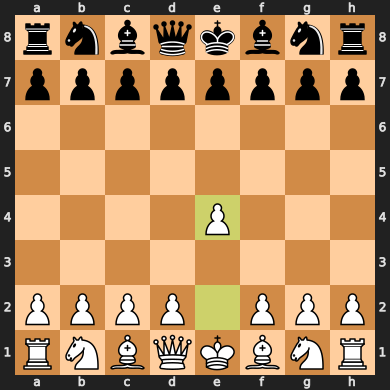

In [35]:
board

In [84]:
game_0['moves']

['g1f3',
 'e7e6',
 'd2d4',
 'd7d5',
 'e2e3',
 'g8f6',
 'f1d3',
 'f8e7',
 'e1g1',
 'e8g8',
 'b2b3',
 'b8d7',
 'c1b2',
 'b7b6',
 'c2c4',
 'c8b7',
 'b1c3',
 'c7c5',
 'c4d5',
 'f6d5',
 'c3d5',
 'b7d5',
 'd1e2',
 'c5d4',
 'f3d4',
 'd7c5',
 'd3c2',
 'e7f6',
 'e3e4',
 'd5b7',
 'e4e5',
 'f6g5',
 'f2f4',
 'g5h6',
 'a1d1',
 'd8h4',
 'g2g3',
 'h4h3',
 'b3b4',
 'b7a6',
 'b4b5',
 'a6b7',
 'd4c6',
 'a7a6',
 'b2a3',
 'a6b5',
 'a3c5',
 'b6c5',
 'e2e4',
 'g7g6',
 'c6e7',
 'g8g7',
 'e4b7',
 'a8a2',
 'd1d2',
 'f8a8',
 'b7b5',
 'a2a1',
 'c2d3',
 'h6f4',
 'g3f4',
 'h3g4',
 'd2g2',
 'g4f4',
 'f1a1',
 'a8a1',
 'd3f1',
 'f4e3',
 'g2f2',
 'e3g5',
 'f2g2',
 'g5e7',
 'b5d3',
 'e7h4',
 'd3f3',
 'h4d4',
 'g2f2',
 'a1a7',
 'f3f6',
 'g7g8',
 'f6d8',
 'g8g7',
 'd8f6',
 'g7h6',
 'g1g2',
 'd4g4',
 'g2h1',
 'g4e4',
 'h1g1',
 'c5c4',
 'f6d8',
 'a7a8',
 'd8f6',
 'e4g4',
 'f2g2',
 'g4d4',
 'g2f2',
 'a8a2',
 'f6f7',
 'a2f2',
 'f7f2',
 'd4e5',
 'f1e2',
 'c4c3',
 'f2h4',
 'h6g7',
 'h4e7',
 'g7g8',
 'e7e8',
 'g8g7',
 'e8e7',
 

In [88]:
len(game_0['moves'])

115

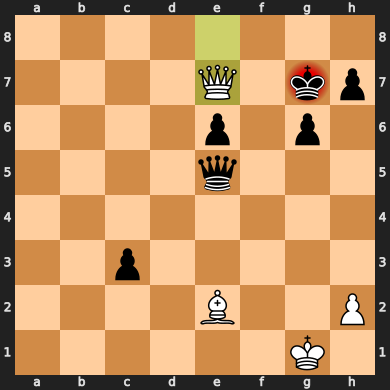

In [89]:
#Play a game up to move number

move_number=115

row={}
row['taken']=[]
board=chess.Board()
for san in game_0['moves'][:move_number]:
    parsed_san=board.parse_san(san)#move by the san "Standard Algebraic Notation"
    taken=board.piece_at(parsed_san.to_square)
    if taken:
        row['taken'].append(taken.__str__())
    move=board.push_san(san)
board

In [90]:
san

'e8e7'

In [92]:
import random

#Used by chessnit.com
def build_stored_game_analysis(game_0, move_number):
    row={}
    row['move_number']=move_number
    row['taken']=[]
    board=chess.Board()
    for san in game_0['moves'][:move_number]:
        parsed_san=board.parse_san(san)
        taken=board.piece_at(parsed_san.to_square)
        if taken:
            row['taken'].append(taken.__str__())
        move=board.push_san(san)
    row['invalid']=bool(board.promoted) or bool(board.outcome())
    stockfish_good.set_fen_position(board.fen())
    evaluation=stockfish_good.get_evaluation()
    row['evaluation']=evaluation['value']
    
    
    row['taken_score']=sum([piece_scores.get(p) for p in row['taken']])*100
    row['fen']=board.fen()
    row['url']=game_0['headers'].get("_others",{}).get("LichessURL","")+f"#{move_number}"
    try:
        row['last_move']=san
    except:
        print(game)
        row['invalid']=True
    return row
row=build_stored_game_analysis(game_0, 115) # (game, move no.)
row

{'move_number': 115,
 'taken': ['p',
  'P',
  'n',
  'N',
  'P',
  'p',
  'P',
  'n',
  'B',
  'b',
  'P',
  'p',
  'P',
  'b',
  'P',
  'r',
  'R',
  'N',
  'p',
  'R',
  'r',
  'P'],
 'invalid': False,
 'evaluation': 0,
 'taken_score': 0,
 'fen': '8/4Q1kp/4p1p1/4q3/8/2p5/4B2P/6K1 b - - 11 58',
 'url': 'https://lichess.org/zdRVdWjd#115',
 'last_move': 'e8e7'}

In [95]:
stockfish.set_fen_position('8/4Q1kp/4p1p1/4q3/8/2p5/4B2P/6K1 b - - 11 58')
stockfish.get_evaluation()

{'type': 'cp', 'value': 0}

In [94]:
stockfish.get_top_moves(3)

[{'Move': 'd4b5', 'Centipawn': 305, 'Mate': None},
 {'Move': 'e2f2', 'Centipawn': 285, 'Mate': None},
 {'Move': 'b4b5', 'Centipawn': 211, 'Mate': None}]

In [41]:
#Look at the URL and compare against our evaluation
print(row['url'])

https://lichess.org/zdRVdWjd#40


In [97]:
rows=[]
for move_number in tqdm.tqdm(range(1,151+1)):
    rows.append(build_stored_game_analysis(game_0, move_number))
moves=pd.DataFrame(rows).set_index("move_number")
moves

100%|█████████████████████████████████████████| 151/151 [01:58<00:00,  1.27it/s]


,taken,invalid,evaluation,taken_score,fen,url,last_move
move_number,,,,,,,
1,[],False,32,0,rnbqkbnr/pppppppp/8/8/8/5N2/PPPPPPPP/RNBQKB1R ...,https://lichess.org/zdRVdWjd#1,g1f3
2,[],False,30,0,rnbqkbnr/pppp1ppp/4p3/8/8/5N2/PPPPPPPP/RNBQKB1...,https://lichess.org/zdRVdWjd#2,e7e6
3,[],False,31,0,rnbqkbnr/pppp1ppp/4p3/8/3P4/5N2/PPP1PPPP/RNBQK...,https://lichess.org/zdRVdWjd#3,d2d4
4,[],False,29,0,rnbqkbnr/ppp2ppp/4p3/3p4/3P4/5N2/PPP1PPPP/RNBQ...,https://lichess.org/zdRVdWjd#4,d7d5
5,[],False,11,0,rnbqkbnr/ppp2ppp/4p3/3p4/3P4/4PN2/PPP2PPP/RNBQ...,https://lichess.org/zdRVdWjd#5,e2e3
...,...,...,...,...,...,...,...
147,"[p, P, n, N, P, p, P, n, B, b, P, p, P, b, P, ...",False,0,0,8/4Q1kp/4p1p1/4q3/8/2p5/4B2P/6K1 b - - 11 58,https://lichess.org/zdRVdWjd#147,e8e7
148,"[p, P, n, N, P, p, P, n, B, b, P, p, P, b, P, ...",False,0,0,8/4Q1kp/4p1p1/4q3/8/2p5/4B2P/6K1 b - - 11 58,https://lichess.org/zdRVdWjd#148,e8e7
149,"[p, P, n, N, P, p, P, n, B, b, P, p, P, b, P, ...",False,0,0,8/4Q1kp/4p1p1/4q3/8/2p5/4B2P/6K1 b - - 11 58,https://lichess.org/zdRVdWjd#149,e8e7


<Axes: xlabel='move_number'>

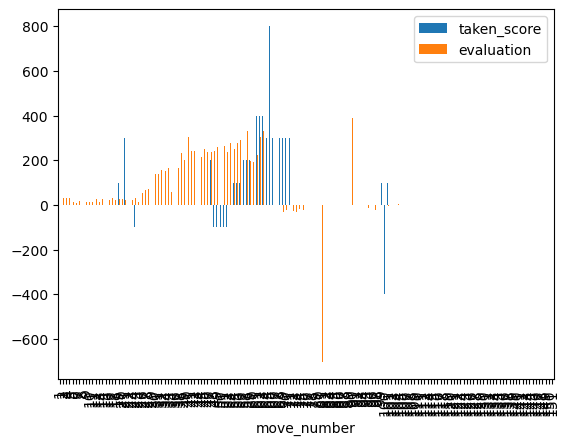

In [98]:
moves[['taken_score','evaluation']].plot(kind="bar")

Moves 30, 37, 40 all blunders/innacuracies

In [135]:
def play_board(moves):
    #Adding this function to make investigating easier
    taken_pieces=[]
    board=chess.Board()
    for san in moves:
        parsed_san=board.parse_san(san)
        taken=board.piece_at(parsed_san.to_square)
        if taken:
            taken_pieces.append(taken.__str__())
        move=board.push_san(san)
    return board,taken_pieces

def build_stored_game_analysis_smart_dumb(game, move_number):
    row={}
    row['move_number']=move_number
    board,row['taken']=play_board(game_0['moves'][:move_number])

    row['invalid']=bool(board.promoted) or bool(board.outcome())
    stockfish_good.set_fen_position(board.fen())
    evaluation=stockfish_good.get_evaluation()
    row['smart_evaluation']=evaluation['value']
    
    stockfish_bad.set_fen_position(board.fen())
    evaluation=stockfish_bad.get_evaluation()
    row['dumb_evaluation']=evaluation['value']
    
    
    row['taken_score']=sum([piece_scores.get(p) for p in row['taken']])*100
    row['fen']=board.fen()
    row['url']=game_0['headers'].get("_others",{}).get("LichessURL","")+f"#{move_number}"
    try:
        row['last_move']=san
    except:
        print(game_0)
        row['invalid']=True
    return row
row=build_stored_game_analysis_smart_dumb(game_0, 40)
row

{'move_number': 40,
 'taken': ['p', 'P', 'n', 'N', 'P', 'p'],
 'invalid': False,
 'smart_evaluation': 303,
 'dumb_evaluation': 261,
 'taken_score': 0,
 'fen': 'r4rk1/p4ppp/bp2p2b/2n1P3/1P1N1P2/6Pq/PBB1Q2P/3R1RK1 w - - 1 21',
 'url': 'https://lichess.org/zdRVdWjd#40',
 'last_move': 'e8e7'}

In [136]:
stockfish_bad.get_evaluation()

{'type': 'cp', 'value': 294}

In [137]:
stockfish.get_evaluation()

{'type': 'cp', 'value': 0}

In [138]:
stockfish_bad.get_top_moves(3)

[{'Move': 'd4b5', 'Centipawn': 305, 'Mate': None},
 {'Move': 'e2d2', 'Centipawn': 291, 'Mate': None},
 {'Move': 'e2f3', 'Centipawn': 196, 'Mate': None}]

In [139]:
stockfish_good.get_top_moves(3)

[{'Move': 'd4b5', 'Centipawn': 305, 'Mate': None},
 {'Move': 'e2f2', 'Centipawn': 285, 'Mate': None},
 {'Move': 'b4b5', 'Centipawn': 211, 'Mate': None}]

In [140]:
stockfish_bad.get_top_moves(3)

[{'Move': 'd4b5', 'Centipawn': 308, 'Mate': None},
 {'Move': 'e2d2', 'Centipawn': 291, 'Mate': None},
 {'Move': 'e2f3', 'Centipawn': 197, 'Mate': None}]

<Axes: xlabel='move_number'>

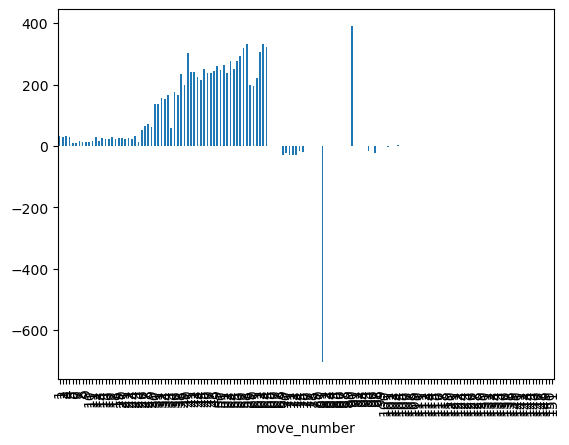

In [141]:
moves['evaluation'].plot(kind='bar')

In [146]:
min(moves['evaluation'])

-704